# <b>IFI 8420 - Assignment 3</b>
### Team 5
Mina Carbajal, Carmen Morales-Mier, Gaayathri Rayapaneni, Ignatius Jonathan Sugijono

<hr>

#### Installing all the requirement packages

In [84]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler

#### Downloading CreditCard CSV data

In [72]:
credit_df = pd.read_csv('CreditCard.csv')
print(credit_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   card         1319 non-null   object 
 1   reports      1319 non-null   int64  
 2   age          1319 non-null   float64
 3   income       1319 non-null   float64
 4   share        1319 non-null   float64
 5   expenditure  1319 non-null   float64
 6   owner        1319 non-null   object 
 7   selfemp      1319 non-null   object 
 8   dependents   1319 non-null   int64  
 9   months       1319 non-null   int64  
 10  majorcards   1319 non-null   int64  
 11  active       1319 non-null   int64  
dtypes: float64(4), int64(5), object(3)
memory usage: 123.8+ KB
None


<hr>

### <b>Section 1</b> - CreditCard data set
##### <u>Section Code Split</u>
<ul>
    <li>Mina - A, B, C</li>
    <li>Carmen - </li>
    <li>Gaayathri - </li>
    <li>Jonathan - D, E, F</li>   
</ul>

#### Summary stat for all the variables in the CreditCard data. (<b>A</b>)

In [57]:
credit_df.describe()

,reports,age,income,share,expenditure,dependents,months,majorcards,active
count,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000
mean,0.456406,33.213103,3.365376,0.068732,185.057071,0.993935,55.267627,0.817286,6.996967
std,1.345267,10.142783,1.693902,0.094656,272.218917,1.247745,66.271746,0.386579,6.305812
min,0.000000,0.166667,0.210000,0.000109,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,25.416670,2.243750,0.002316,4.583333,0.000000,12.000000,1.000000,2.000000
50%,0.000000,31.250000,2.900000,0.038827,101.298300,1.000000,30.000000,1.000000,6.000000
75%,0.000000,39.416670,4.000000,0.093617,249.035800,2.000000,72.000000,1.000000,11.000000
max,14.000000,83.500000,13.500000,0.906320,3099.505000,6.000000,540.000000,1.000000,46.000000


#### Getting data with ages over 18 for the analysis. (<b>B</b>)

In [43]:
credit_18_df = credit_df[credit_df['age'] > 18].copy()
credit_18_df['card'] = credit_18_df['card'].apply(lambda x: 1 if x == 'yes' else 0)
credit_18_df.head()

,card,reports,age,income,share,expenditure,owner,selfemp,dependents,months,majorcards,active
0,1,0,37.66667,4.5200,0.033270,124.983300,yes,no,3,54,1,12
1,1,0,33.25000,2.4200,0.005217,9.854167,no,no,3,34,1,13
2,1,0,33.66667,4.5000,0.004156,15.000000,yes,no,4,58,1,5
3,1,0,30.50000,2.5400,0.065214,137.869200,no,no,0,25,1,7
4,1,0,32.16667,9.7867,0.067051,546.503300,yes,no,2,64,1,5


#### Plot of <u>income</u> vs. <u>reports</u>. (<b>C</b>)

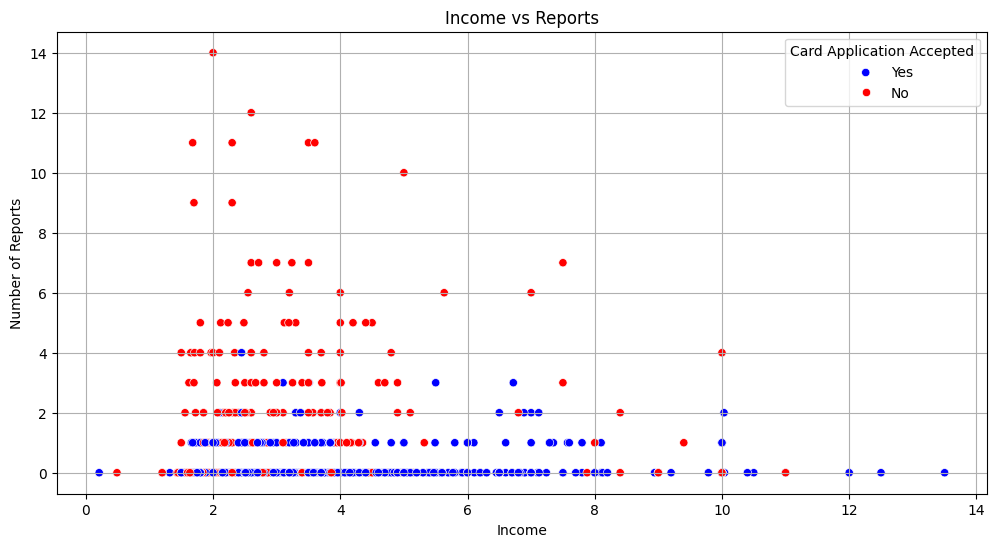

In [6]:
plt.figure(figsize=(12, 6))

sns.scatterplot(
    data=credit_18_df,
    x='income',
    y='reports',
    hue='card',
    palette={1: 'blue', 0: 'red'}
)

plt.title('Income vs Reports')
plt.xlabel('Income')
plt.ylabel('Number of Reports')
plt.legend(title='Card Application Accepted', labels=['Yes', 'No'])
plt.grid(True)
plt.show()

#### Boxplot of <u>income</u> as a function of card acceptance status and of <u>reports</u> as a function of card acceptance status. (<b>D</b>)

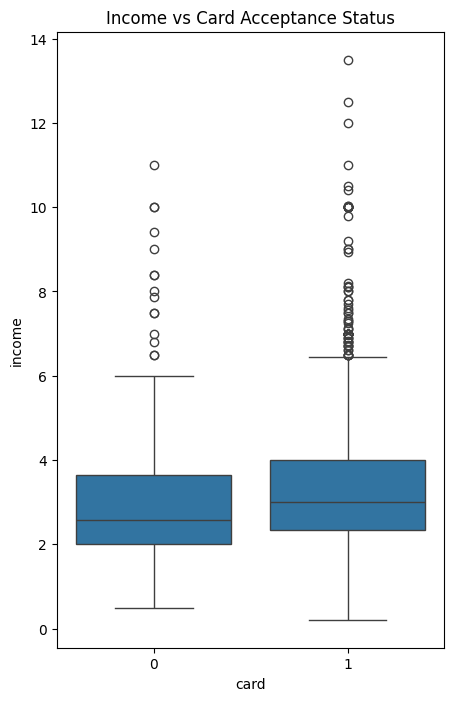

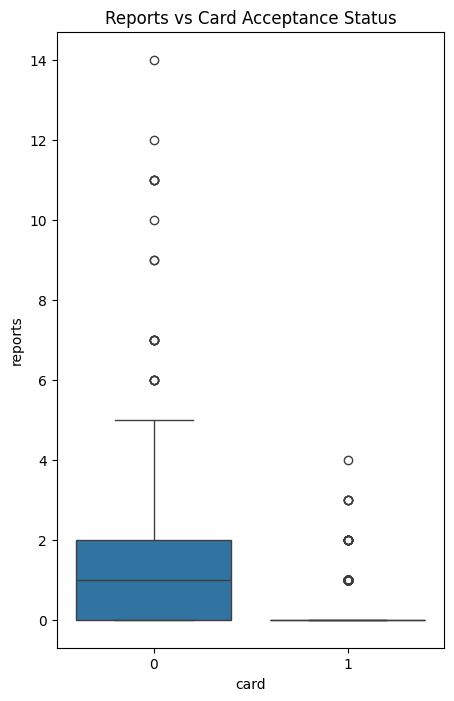

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming `data` is your pandas DataFrame with 'income', 'reports', and 'card_status' columns.

# Boxplot for income as a function of card acceptance status
plt.figure(figsize=(5, 8))
sns.boxplot(x='card', y='income', data=credit_18_df)
plt.title('Income vs Card Acceptance Status')
plt.show()

# Boxplot for reports as a function of card acceptance status
plt.figure(figsize=(5, 8))
sns.boxplot(x='card', y='reports', data=credit_18_df)
plt.title('Reports vs Card Acceptance Status')
plt.show()


### Histograms for the predictors. (<b>E</b>)

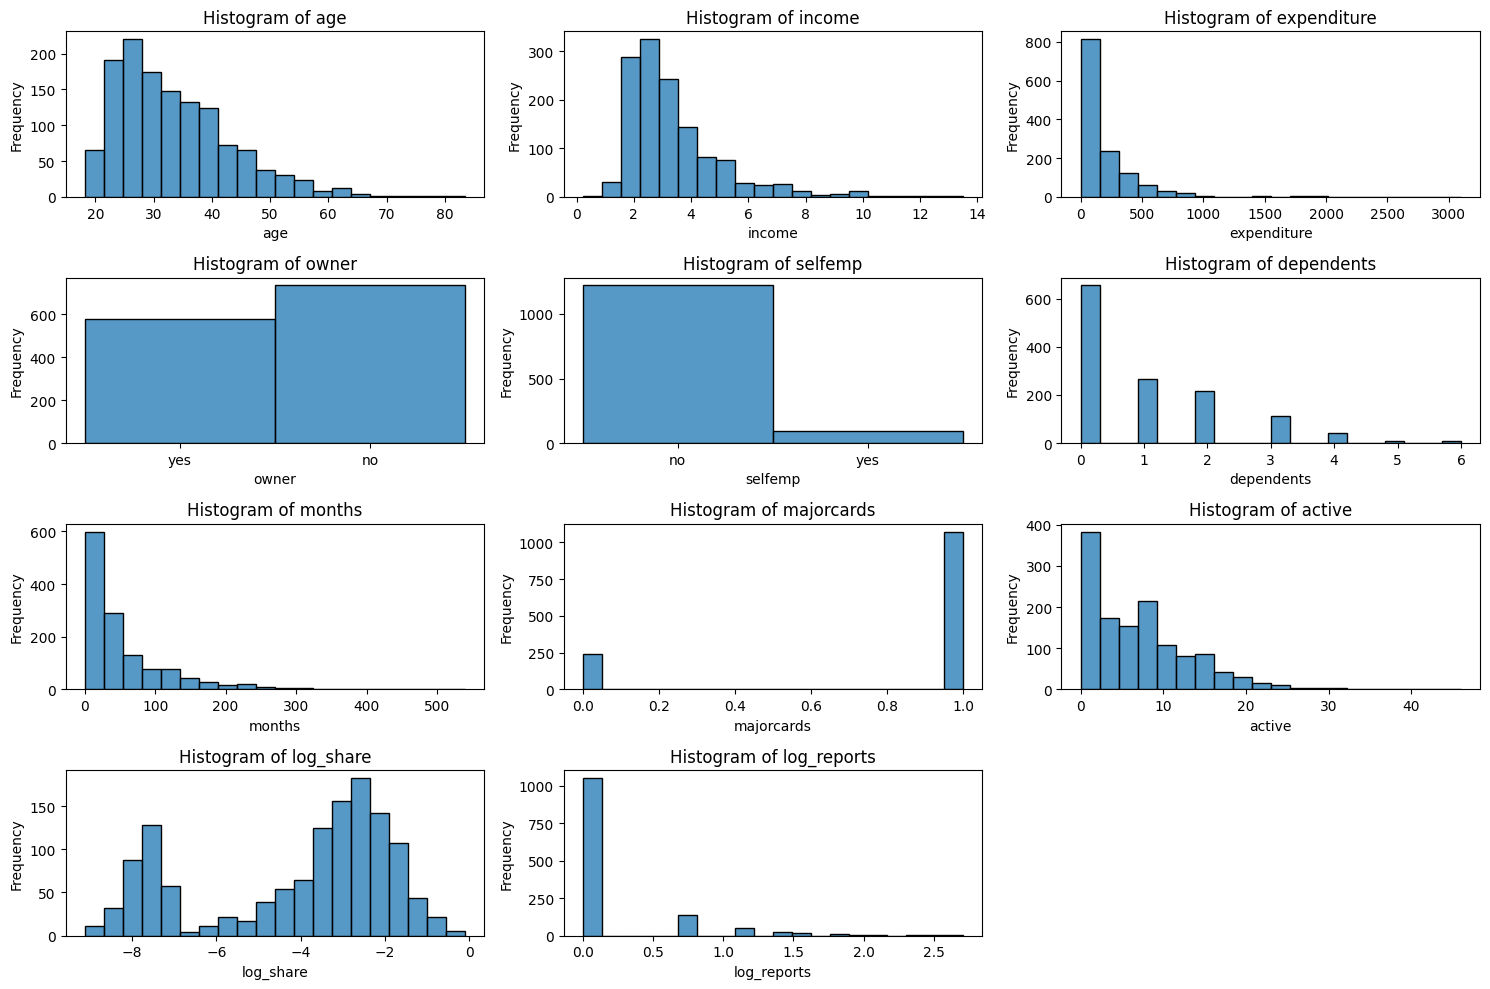

In [37]:
credit_18_df['log_share'] = np.log(credit_18_df['share'])
credit_18_df['log_reports'] = np.log(credit_18_df['reports'] + 1)

predictors = credit_18_df.drop(columns=['card', 'share', 'reports']).columns.tolist()

plt.figure(figsize=(15, 10))

for i, predictor in enumerate(predictors, 1):
    plt.subplot((len(predictors) + 2) // 3, 3, i)
    sns.histplot(credit_18_df[predictor].dropna(), bins=20)
    plt.title(f'Histogram of {predictor}')
    plt.xlabel(predictor)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


### Using Logistic Regression with variables 2 to 8 determine which of the predictors influence the probability that an application is accepted + summary of the model. (<b>F</b>)

In [86]:
df_logreg = credit_df.copy()

df_logreg['log_share'] = np.log(df_logreg['share'])
df_logreg['log_reports'] = np.log(df_logreg['reports'] + 1)
df_logreg = df_logreg.drop(columns=['share', 'reports'])

df_logreg = df_logreg.replace({'yes': 1, 'no': 0})
df_logreg = df_logreg.infer_objects(copy=False)

logreg = LogisticRegression()
scaler = StandardScaler()

X = df_logreg[['log_reports','income','age','owner','dependents','months','log_share']]
y = df_logreg['card']

X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

X_sm = sm.add_constant(X)

logit_model = sm.Logit(y, X_sm).fit()

print(logit_model.summary())

Optimization terminated successfully.
         Current function value: 0.053042
         Iterations 12
                           Logit Regression Results                           
Dep. Variable:                   card   No. Observations:                 1319
Model:                          Logit   Df Residuals:                     1311
Method:                           MLE   Df Model:                            7
Date:                Mon, 10 Mar 2025   Pseudo R-squ.:                  0.9004
Time:                        11:18:53   Log-Likelihood:                -69.963
converged:                       True   LL-Null:                       -702.28
Covariance Type:            nonrobust   LLR p-value:                7.398e-269
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          21.4906      3.675      5.848      0.000      14.288      28.693
log_reports    -2.9063   

### Converting the predicted probabilities into class labels + computing the confusion matrix and overall fraction of correct predictions. (<b>G</b>)

### Fitting the model using a training data for observations 1 to 1000 + computing the confusion matrix and overall fraction of correct predictions for the test data. (<b>H</b>)

### Applying Discriminant Analysis (LDA), Nearest-Neighbors, Naïve Bayes in the training and test data + model performance metrics. (<b>I</b>)

### Comparison + final model selection and validation of the models from (H) and (I), <i>written in Python</i>. (<b>J</b>)